In [1]:
# Model design
import agentpy as ap
import networkx as nx 
import random 
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import IPython
import pickle
np.random.seed(42)

In [2]:
import os

if os.path.isdir("../notebooks"):
    os.chdir("..")

from utils import viz, delta_function, transform_pd

from agent import Person

from model import VirusModel, VirusModel_baseline


In [3]:
parameters = {
    'my_parameter':42,
    'agents':500,
    'steps':100,
    'wealth_appeal_corr': 0, # >0 more wealth higher appeal chance
    'acc': 0.8, # accuracy of fraud prdediction
    'appeal_wealth': 0.3, # minimal wealth needed for appeal (could also become a param for distr. eventually)
    #'wealth_impact'
    'clf': 'pretrained', # None, 'hist'
    'expi': 'appeal',
    'fraud_det': 0,
    'fairness_metrics' : True
    
}

In [25]:
parameters_b = {
    'my_parameter':42,
    'agents':500,
    'steps':100,
    'wealth_appeal_corr': 0, # >0 more wealth higher appeal chance
    'acc': 0.8, # accuracy of fraud prdediction
    'appeal_wealth': 0.3, # minimal wealth needed for appeal (could also become a param for distr. eventually)
    #'wealth_impact'
    'clf': None, # None, 'hist'
    'expi': 'appeal',
    'fraud_det': 0,
    'fairness_metrics' : True
    
    
}


In [30]:
exp1 = ap.Experiment(VirusModel_baseline, parameters, iterations =2, record=True)
results_baseline = exp1.run() 

df_baseline = results_baseline['variables']['Person']

exp2 = ap.Experiment(VirusModel_baseline, parameters_b, iterations =2, record=True)
results = exp2.run() 

df = results['variables']['Person']

df = transform_pd(df)
df_baseline = transform_pd(df_baseline)

df

Scheduled runs: 2
using predtrined clf


KeyboardInterrupt: 

## Visualization

In [8]:
def viz2(data, x, y):
    fig, ax = plt.subplots()

    sns.lineplot(ax = ax,
                 data = data,
                 x = x,
                 y = y,
                 marker = 'o')
    
    # plt.ylim(0,0.2)
    # plt.xlim(0,50)

    plt.show()

def viz(data, x, y, hue, title = None):
    fig, ax = plt.subplots()

    sns.lineplot(ax = ax,
                 data = data,
                 x = x,
                 y = y,
                 hue = hue,
                 marker = 'o')
    
    # plt.ylim(0,0.2)
    # plt.xlim(0,50)
    plt.title(title)

    plt.show()

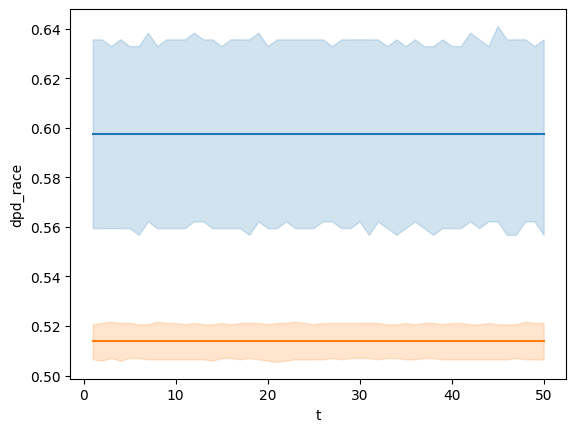

In [36]:
fig, ax = plt.subplots()

# sns.lineplot(   x =  df_baseline.index.get_level_values('t'),
#                 y = df_baseline['eod_gender'])

# sns.lineplot(   x =  df_baseline.index.get_level_values('t'),
#                 y = df_baseline['eod_race'])
sns.lineplot(   x =  df_baseline.index.get_level_values('t'),
                y = df_baseline['dpd_race'])
sns.lineplot(   x =  df_baseline.index.get_level_values('t'),
                y = df_baseline['dpd_gender'])
# plt.ylim(0,0.2)
# plt.xlim(0,50)

plt.show()



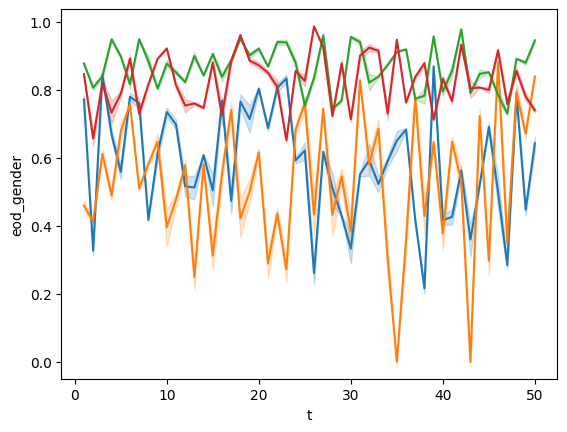

In [38]:
fig, ax = plt.subplots()

sns.lineplot(   x =  df.index.get_level_values('t'),
                y = df['eod_gender'])

sns.lineplot(   x =  df.index.get_level_values('t'),
                y = df['eod_race'])
sns.lineplot(   x =  df.index.get_level_values('t'),
                y = df['dpd_gender'])

sns.lineplot(   x =  df.index.get_level_values('t'),
                y = df['dpd_race'])
# plt.ylim(0,0.2)
# plt.xlim(0,50)

plt.show()

<AxesSubplot: xlabel='intersect', ylabel='Count'>

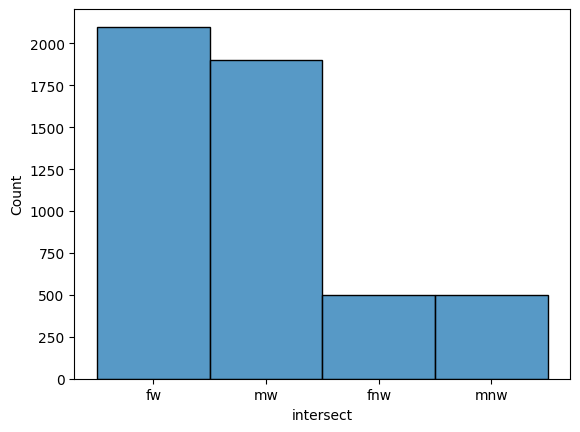

In [16]:
sns.histplot(df_baseline['intersect'])

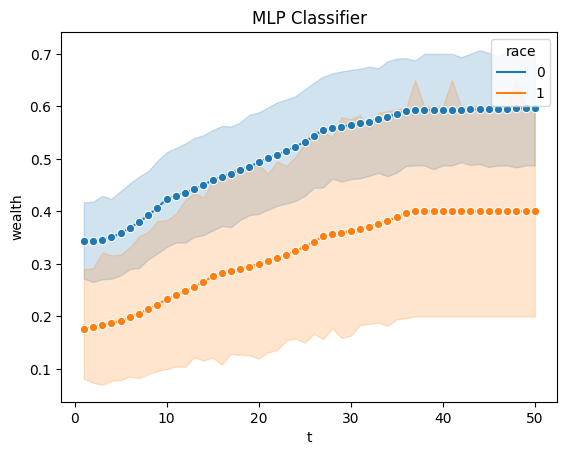

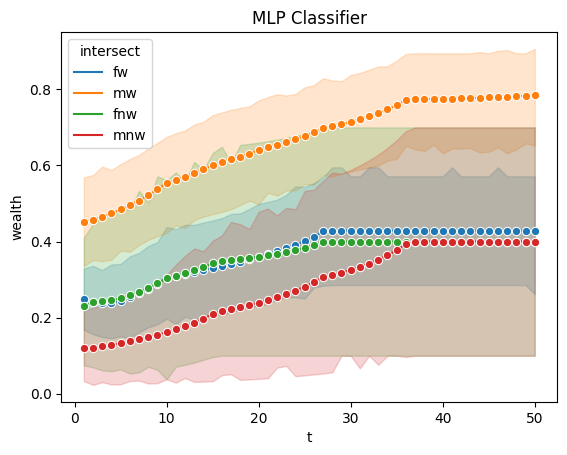

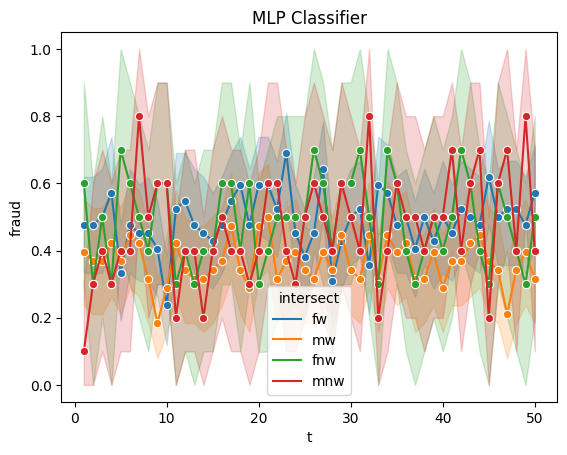

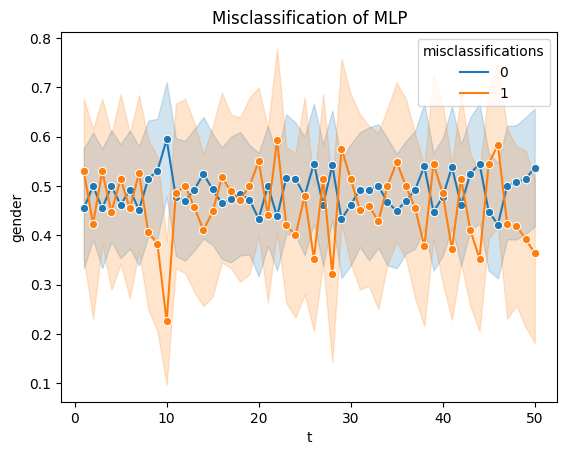

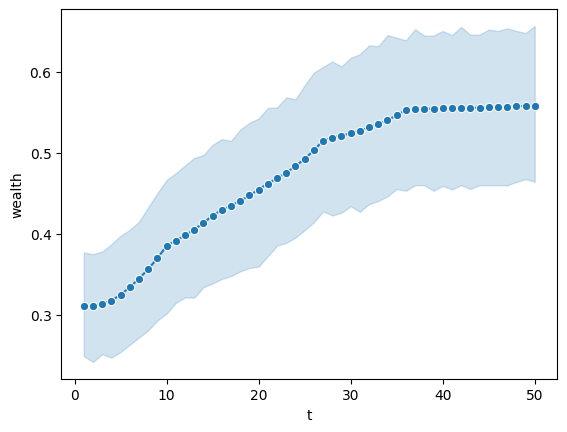

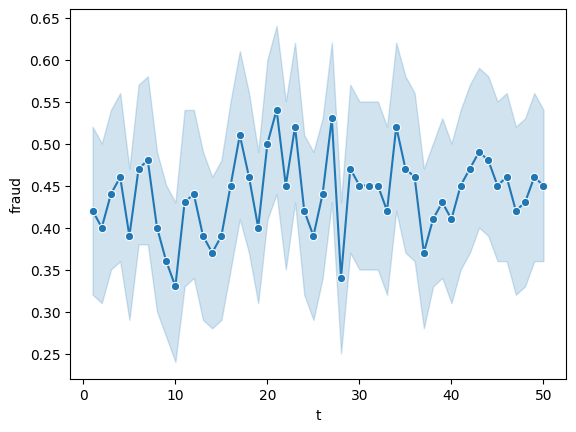

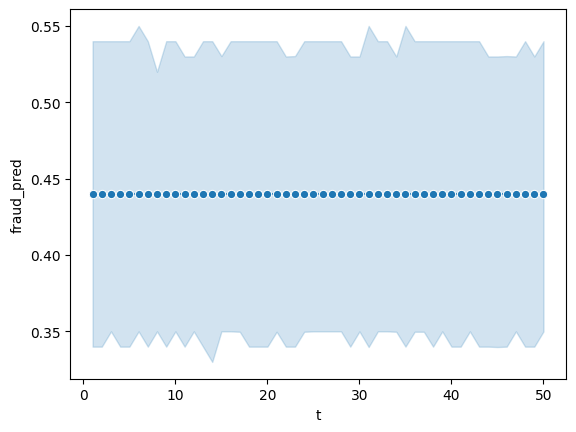

In [11]:
viz(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['wealth'], df_baseline['race'], title= 'MLP Classifier') #, df_baseline['convicted'])

viz(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['wealth'], df_baseline['intersect'], title = 'MLP Classifier') #, df_baseline['convicted'])

viz(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['fraud'], df_baseline['intersect'], title = 'MLP Classifier') #, df_baseline['convicted'])


viz(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['gender'], (df_baseline['misclassifications']), title= 'Misclassification of MLP') #, df_baseline['convicted'])

viz2(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['wealth'])
viz2(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['fraud'])
viz2(df_baseline, df_baseline.index.get_level_values('t'), df_baseline['fraud_pred'])

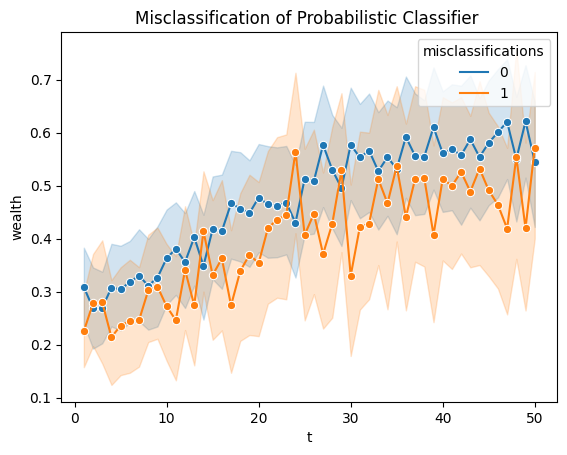

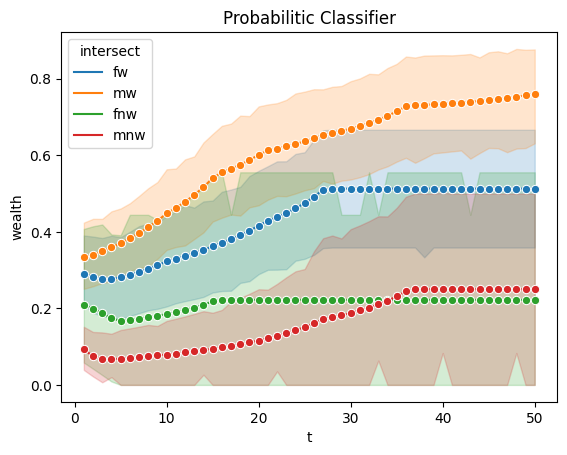

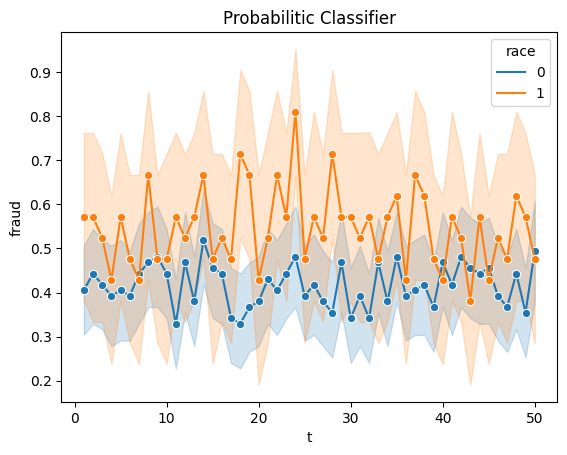

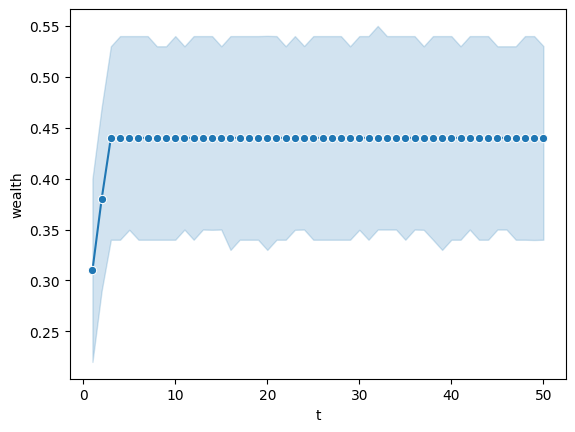

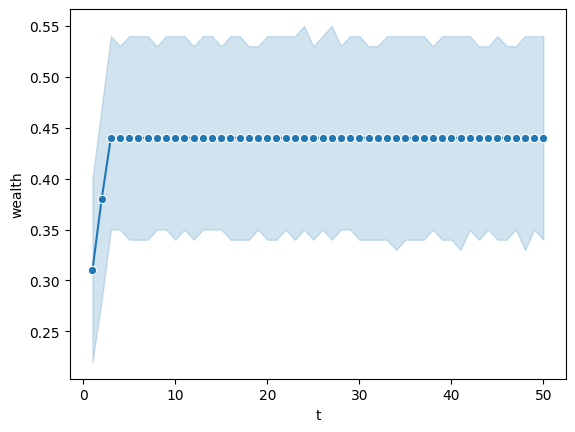

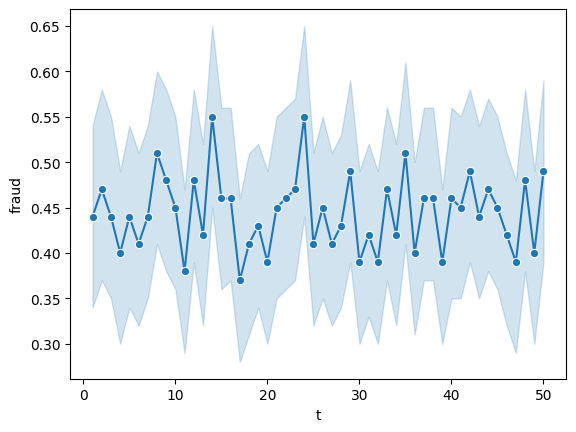

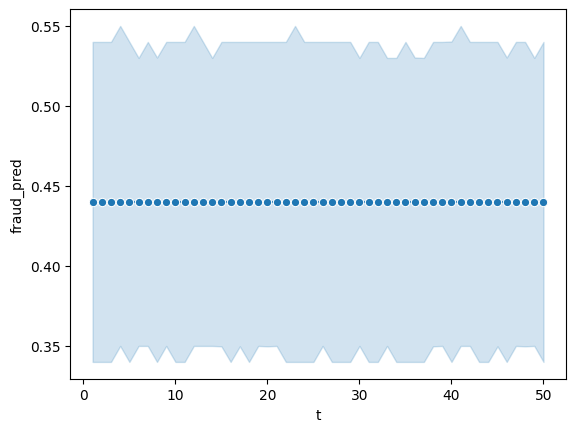

In [24]:
viz(df, df.index.get_level_values('t'), df['wealth'], abs(df['misclassifications']), title = 'Misclassification of Probabilistic Classifier ') #, df_baseline['convicted'])

viz(df, df.index.get_level_values('t'), df['wealth'], df['intersect'], title= 'Probabilitic Classifier') #, df_baseline['convicted'])

viz(df, df.index.get_level_values('t'), df['fraud'], df['race'], title= 'Probabilitic Classifier') #, df_baseline['convicted'])


# viz(df_b, df.index.get_level_values('t'), df_b['wealth'], df_b['fraud'],title= 'Probabilitic Classifier') #, df_baseline['convicted'])
viz2(df, df.index.get_level_values('t'), df['wealth']<0.1)
viz2(df, df.index.get_level_values('t'), df['wealth']<0.1)
viz2(df, df.index.get_level_values('t'), df['fraud'])
viz2(df, df.index.get_level_values('t'), df['fraud_pred'])

/Users/uni/Documents/Git/abm/basic/utils.py:73: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_wb1 = df.iloc[(df[disc_axis] == i).values][y_axis] - df_b1.groupby(level='t').mean()[y_axis]
/Users/uni/Documents/Git/abm/basic/utils.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x1[y_axis] = df_wb1
/Users/uni/Documents/Git/abm/basic/utils.py:73: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which shoul

                       wealth   health  fraud_pred  fraud  race  gender  \
iteration obj_id t                                                        
0         28     1   0.190037  0.37454           0      0     1       0   
                 2   0.220322  0.37454           0      1     1       0   
                 3   0.249885  0.37454           0      1     1       0   
                 4   0.278251  0.37454           0      0     1       0   
                 5   0.302061  0.37454           0      0     1       0   
...                       ...      ...         ...    ...   ...     ...   
1         99     46 -0.318078  0.37454           1      1     0       1   
                 47 -0.318960  0.37454           1      1     0       1   
                 48 -0.319576  0.37454           1      1     0       1   
                 49 -0.318685  0.37454           1      1     0       1   
                 50 -0.319393  0.37454           1      1     0       1   

                     con

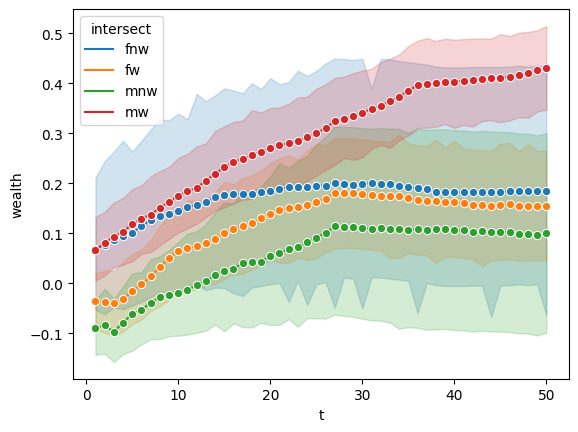

In [29]:
df_xb = delta_function('intersect', 'wealth', df_baseline, df)
print(df_xb)
viz(df_xb, df_xb.index.get_level_values('t'), df_xb['wealth'].astype(float), df_xb['intersect'])